In [3]:
import numpy as np # It contains multi dimensional arrays and matrices 
import pandas as pd # for data storing 
import matplotlib.pyplot as plt # for plotting we use this 
import warnings
warnings.filterwarnings('ignore')# we are ignoring warning messages
from sklearn.naive_bayes import MultinomialNB 
# helps in classifind discrete features
from sklearn.multiclass import OneVsRestClassifier
# to classify the positive and negative samples regarding the category
from sklearn import metrics 
# metrics is used for comparison and  tracking performing and production
# sklearn supports classification,regression  , naive bayes and many other features
from sklearn.metrics import accuracy_score 
#set of labels predicted for a sample must exactly match the corresponding set of labels in y and how accurate it is we can get.
from pandas.plotting import scatter_matrix
#to draw scatter plots
from sklearn.neighbors import KNeighborsClassifier
# his classifier implements learning based on the k nearest neighbors. 
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
#UTF-8 is one of the most commonly used encodings, and Python often defaults to using it.
resumeDataSet['cleaned_resume'] = ''
# we are defining cleaned_Resume as blank at present.
resumeDataSet.head()


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


# New Section

In [ ]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Blockchain                   40
Mechanical Engineer          40
Data Science                 40
Operations Manager           40
ETL Developer                40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


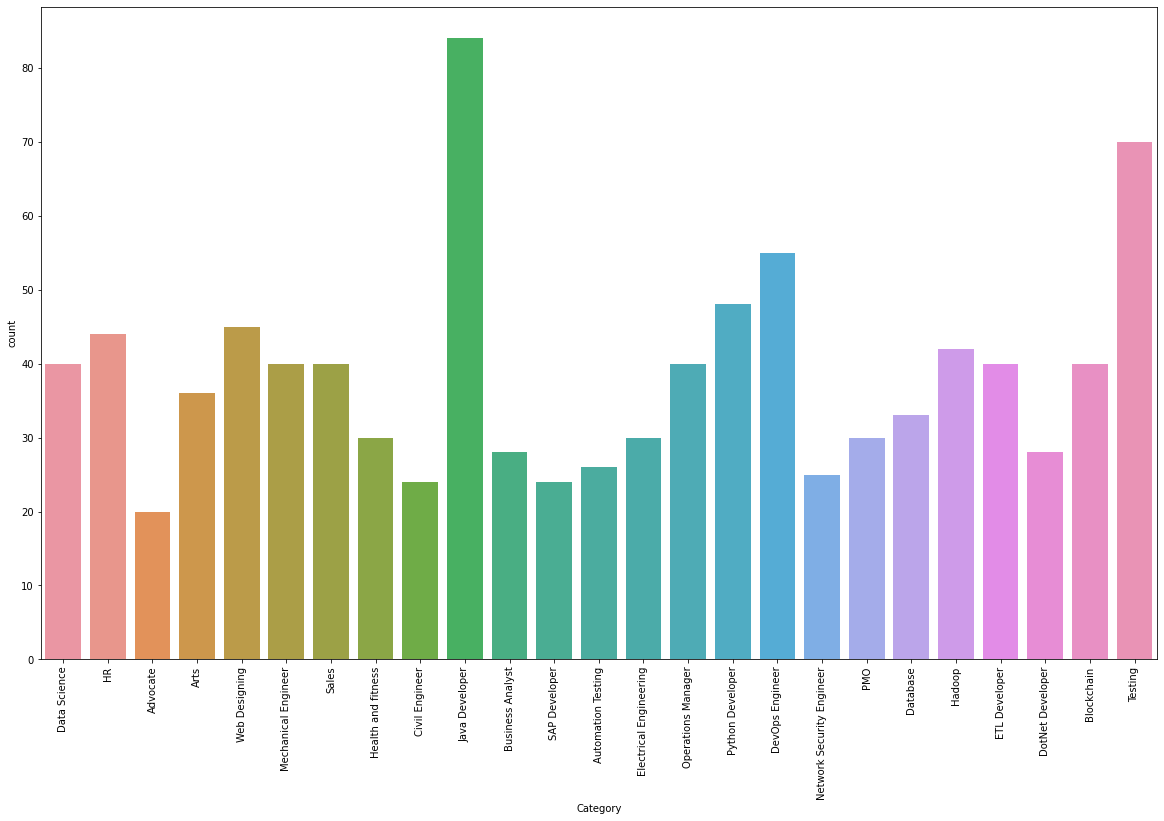

In [ ]:
import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib.
plt.figure(figsize=(20,12))
#figsize is a tuple of the width and height of the figure in inches
plt.xticks(rotation=90)
# here we used xtick function such that x label had rotated 90 degree.


sns.countplot(x="Category", data=resumeDataSet)

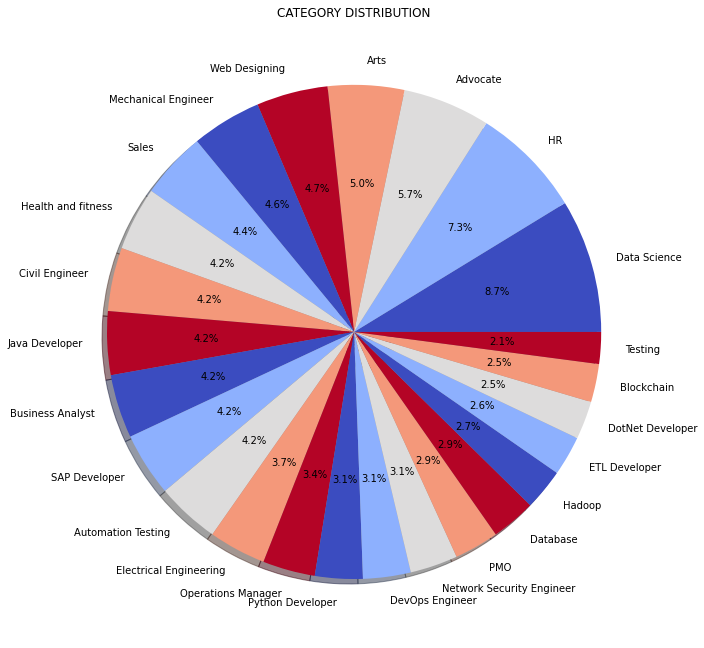

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = [re.sub('http\S+\s*', ' ', resumeText)]  # remove URLs
    resumeText = [re.sub('RT|cc', ' ', resumeText) ] # remove RT and cc
    resumeText = [re.sub('#\S+', '', resumeText) ] # remove hashtags
    resumeText = [re.sub('@\S+', '  ', resumeText) ] # remove mentions
    resumeText = [re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)]  # remove punctuations
    resumeText = [re.sub(r'[^\x00-\x7f]',r' ', resumeText)] 
    resumeText = [re.sub('\s+', ' ', resumeText) ] # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('d

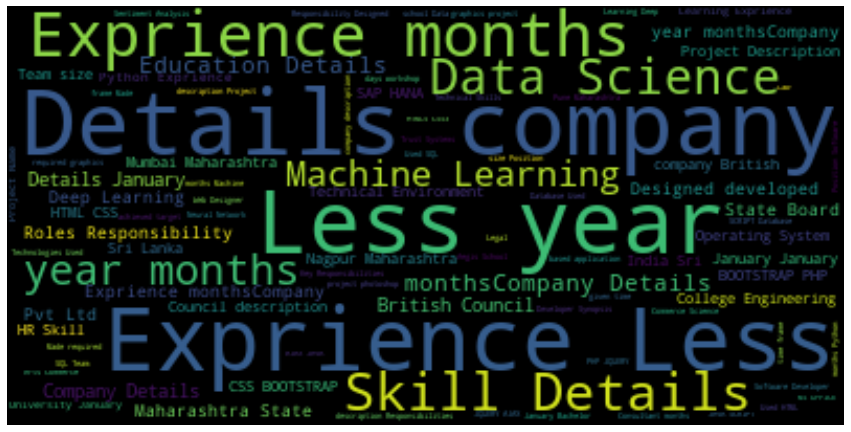

In [ ]:
import nltk
#natural language tool kit,it is one of the nlp library.
#which contains packages to make machines understand human language and reply to it with an appropriate response.
nltk.download('stopwords')
# stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignor
nltk.download('punkt')
#punkt is a tokenizer

from nltk.corpus import stopwords
#corpus is collection of texts, 
#corpus package automatically creates a set of corpus reader instances that can be used to access the corpora in the NLTK data package.
import string
from wordcloud import WordCloud
#. Significant textual data points can be highlighted using a word cloud.


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
#Interpolation is the process of estimating unknown values that fall between known values.
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

var_mod = ['Category']
#encode the ‘Category’ column using LabelEncoding
le = LabelEncoder()
#it sorts categories in alphabetical order and selects distinct element
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
    # fit_transform - Fit label encoder and return encoded labels.


In [ ]:
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets
from sklearn.feature_extraction.text import TfidfVectorizer
#Convert a collection of raw documents to a matrix of TF-IDF(vectors for execution) features.
from scipy.sparse import hstack
#scipy.sparse data structures that enable us store large matrices with very few non-zero elements aka sparse matrices 
#scipy.sparse allows us to perform complex matrix computations.
#hstack is used to Stack sparse matrices horizontally (column wise)
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
#KNeighborsClassifier implements classification based on voting by nearest k-neighbors of target point
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
print("where") 
index=list(range(0,1000))
for i in index:
    try:
        print(i,'  ',le.classes_[i],)
    except:
        break

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
         

In [ ]:
from sklearn import svm
sclf = OneVsRestClassifier(svm.SVC())
#Support vector machines (SVMs) are particular linear classifiers which are based on the margin maximization principle.
#They perform structural risk minimization, which improves the complexity of the classifier ...
# ...with the aim of achieving excellent generalization performance.
sclf.fit(X_train, y_train)
prediction = sclf.predict(X_test)
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(sclf.score(X_train, y_train)))
print('Accuracy of SVM Classifier on test set: {:.2f}'.format(sclf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (sclf, metrics.classification_report(y_test, prediction)))
print("where") 
index=list(range(0,1000))
for i in index:
    try:
        print(i,'  ',le.classes_[i],)
    except:
        break

Accuracy of SVM Classifier on training set: 1.00
Accuracy of SVM Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6   